In [1]:
folder = "../../data_piro/1. ICPMS_Output/"

In [2]:
import pandas as pd

In [6]:
def read_massspec_data(path):
    extension = os.path.splitext(path)[1].lower()
    if extension == ".txt":
        header = pd.read_table(path, sep='\t', nrows=1, header=None)
        colnames = header.loc[:, 1:].values[0].tolist()
        colnames = ['time'] + colnames
        df = pd.read_table(path, sep='\t', skiprows=[0, 1, 2, 3, 4], index_col=False,
                           header=None)
        df = df.loc[:, 0:15]
        df.columns = colnames

    elif extension == ".csv":
        df = pd.read_csv(path, sep=";")
    else:
        print("Unknown file type")
        df = None
    return df

In [7]:
import os

In [9]:
files = os.listdir(folder)

In [106]:
n = 4
print(files[4])
df = read_massspec_data(os.path.join(folder,files[n]))

FEBS-2A-51.TXT


<AxesSubplot:xlabel='time'>

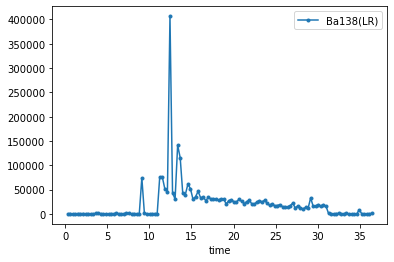

In [93]:
df[['time','Ba138(LR)']].plot(x="time", y="Ba138(LR)",marker='.')

In [25]:
cols = df.columns

In [94]:
def metric(data):
    mean = data.mean()
    upper = data[data>mean]
    lower = data[data<=mean]
    return upper.mean()/upper.std()

{c:metric(df.loc[1:,c]) for c in cols}

{'time': 5.182290352805176,
 'Li6(LR)': 5.931175492294293,
 'Li7(LR)': 1.9707003521886621,
 'Na23(LR)': 1.8337664523680657,
 'Mg24(LR)': 0.7132398381276662,
 'K39(LR)': 4.834236602433055,
 'Ca43(LR)': 2.3574978777552826,
 'Ca44(LR)': 2.756578836238584,
 'Mn55(LR)': nan,
 'Co59(LR)': 0.6145277281834821,
 'Ni60(LR)': 4.41161721070466,
 'Cu63(LR)': 0.5357539272730871,
 'Sr88(LR)': 2.406274265065151,
 'Cd111(LR)': 0.5270568730035341,
 'Ba137(LR)': 0.41661933008620144,
 'Ba138(LR)': 0.8011057360584039}

In [65]:
from sklearn.cluster import SpectralClustering, DBSCAN

In [58]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


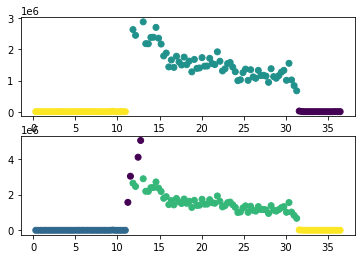

In [141]:
c = "Ca43(LR)"
X = df[["time",c]].values
ss = StandardScaler()
sc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
db = DBSCAN(eps = 0.4)
X = ss.fit_transform(X)
db_fit = db.fit(X)
mask = db_fit.labels_ != -1
X_ = X[mask]
sc_fit = sc.fit(X_)

plt.subplot(211)
plt.scatter(df["time"][mask], df[c][mask], c = sc_fit.labels_)
plt.subplot(212)
plt.scatter(df["time"], df[c], c = db_fit.labels_)

In [142]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

In [151]:
def rank_signal(df, c = "Ba138(LR)"):
    X = df[["time",c]].values
    ss = StandardScaler()
    sc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
    db = DBSCAN(eps = 0.5)
    X = ss.fit_transform(X)
    db_fit = db.fit(X)
    mask = db_fit.labels_ != -1
    X_ = X[mask]
    sc_fit = sc.fit(X_)
    
    #db = DBSCAN(eps = 0.6)
    #db_fit = db.fit(X_)
    num_db_clusters = len(np.unique(db_fit.labels_[mask]))
    return silhouette_score(X_, sc_fit.labels_) #if num_db_clusters < 3 else 0

In [152]:
{c:rank_signal(df, c) for c in cols}

C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\romer\anaconda3\lib

{'time': 0.5556404655430652,
 'Li6(LR)': 0.5765478286801854,
 'Li7(LR)': 0.5481555472633464,
 'Na23(LR)': 0.5978730564696851,
 'Mg24(LR)': 0.4942468952686428,
 'K39(LR)': 0.6946421748601149,
 'Ca43(LR)': 0.6545165594243157,
 'Ca44(LR)': 0.6641881164945369,
 'Mn55(LR)': 0.5648929606297964,
 'Co59(LR)': 0.5221013480435426,
 'Ni60(LR)': 0.3852857880808635,
 'Cu63(LR)': 0.5594105544896866,
 'Sr88(LR)': 0.6362391647460791,
 'Cd111(LR)': 0.5428779011762348,
 'Ba137(LR)': 0.5861622305906902,
 'Ba138(LR)': 0.519884649405057}